# Práctico entregable Aprendizaje No Supervisado

Georgina Flesia -- Laura Alonso Alemany

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---
## Trabajo práctico entregable - Parte 1
---
###Grupo de Trabajo 31
**Integrantes del Grupo:**

Belen Franzoni

Belen Marzola

Guadalupe Peñaranda

Hisam Abou Faker

Marcelo Puiatti

**Tutora:**
*Yihara Isabel Mejia*





Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia.

Cada seccion debe ser comentada con celdas de texto. Elijan la visualización que dé mas información sobre los datos.



1- Análisis exploratorio inicial de la base.



Realizamos el analisis exploratorio, buscando entender la estructura de los datos, las variables presentes, y obtener una primera impresión de su distribución.

In [54]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.io as pio
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns


#Escaleado
from sklearn.preprocessing import StandardScaler
#Imputación
from sklearn.impute import SimpleImputer

#Clustering
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [55]:
# Cargar los datos
#df = pd.read_csv('/home/belu/mediciones_doctorado_nueva/diplo/no_supervisado/female_players.csv')
df = pd.read_csv(r'G:\Unidades compartidas\belenyfede\Diplo2024\AprendizajeNoSupervisado/female_players.csv')
# Información general de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181361 entries, 0 to 181360
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 152.2+ MB


In [118]:
df['player_positions'] = df['player_positions'].str.split(',').str[0]

In [131]:
df['player_positions'].unique()

array(['ST', 'CB', 'RB', 'RW', 'CM', 'GK', 'CDM', 'LM', 'LW', 'CAM', 'RM',
       'LB', 'RWB', 'LWB', 'CF'], dtype=object)

In [56]:
# Visualizar nombre de columnas
print(df.columns.tolist())

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [57]:
# Descripción estadística de las variables numéricas y categóricas
df.describe(include='all')

player_id                      player_url   fifa_version  \
count   181361.000000                          181361  181361.000000   
unique            NaN                          181361            NaN   
top               NaN  /player/227125/sam-kerr/230009            NaN   
freq              NaN                               1            NaN   
mean    234662.993907                             NaN      19.223538   
std      10659.745380                             NaN       2.060414   
min     226177.000000                             NaN      16.000000   
25%     227117.000000                             NaN      17.000000   
50%     227586.000000                             NaN      19.000000   
75%     241226.000000                             NaN      21.000000   
max     273050.000000                             NaN      23.000000   

          fifa_update fifa_update_date   short_name          long_name  \
count   181361.000000           181361       181361             181361   
unique            NaN              512         1690               1654   
top               NaN       2022-09-28  L. Williams  Samantha May Kerr   
freq              NaN              835          543                519   
mean        36.727703              NaN          NaN                NaN   
std         23.555409              NaN          NaN                NaN   
min          1.000000              NaN          NaN                NaN   
25%         16.000000              NaN          NaN                NaN   
50%         35.000000              NaN          NaN                NaN   
75%         54.000000              NaN          NaN                NaN   
max         99.000000              NaN          NaN                NaN   

       player_positions        overall      potential     value_eur  \
count            181361  181361.000000  181361.000000  4.831000e+03   
unique              382            NaN            NaN           NaN   
top                  GK            NaN            NaN           NaN   
freq              22735            NaN            NaN           NaN   
mean                NaN      76.269909      79.672967  1.668368e+07   
std                 NaN       5.709719       5.422202  2.425583e+07   
min                 NaN      49.000000      49.000000  3.250000e+05   
25%                 NaN      72.000000      76.000000  2.600000e+06   
50%                 NaN      76.000000      80.000000  6.500000e+06   
75%                 NaN      80.000000      83.000000  2.050000e+07   
max                 NaN      93.000000      95.000000  1.735000e+08   

           wage_eur            age         dob      height_cm      weight_kg  \
count   4831.000000  181361.000000      181361  181361.000000  181361.000000   
unique          NaN            NaN        1387            NaN            NaN   
top             NaN            NaN  1988-02-29            NaN            NaN   
freq            NaN            NaN        2651            NaN            NaN   
mean     818.505485      26.014099         NaN     168.756464      61.213580   
std      468.435485       3.907456         NaN       6.249204       5.563279   
min      500.000000      16.000000         NaN     150.000000      45.000000   
25%      500.000000      23.000000         NaN     164.000000      57.000000   
50%      700.000000      26.000000         NaN     170.000000      61.000000   
75%     1000.000000      29.000000         NaN     173.000000      65.000000   
max     4000.000000      41.000000         NaN     188.000000      84.000000   

          league_id           league_name  league_level   club_team_id  \
count   4876.000000                  4876        4785.0    4876.000000   
unique          NaN                     3           NaN            NaN   
top             NaN  Women's Super League           NaN            NaN   
freq            NaN                  2428           NaN            NaN   
mean    2215.473749                   NaN           1.0  116009.965135   


La variable **Overall** brinda información del desempeño del las juagdoras a nivel global, lo cual la hace una característica objetiva para rankear a las jugadoras. Se calcula usando otras variables de desempeño (skill_rating).

### Preparamos la base para Clustering:

Retiramos jugadoras con bajo desempeño global ("Overall") y consideramos variables de desempeño por habilidad (skills_ratings)

In [119]:
n=10000
df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadoras

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending',
                  'physic', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                  'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle',
                  'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                  'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
                  'goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

41 variables numéricas: skills/habilidades


In [59]:
df_skills.describe()

pace     shooting      passing    dribbling    defending  \
count  7149.000000  7149.000000  7149.000000  7149.000000  7149.000000   
mean     73.128270    63.127850    69.031753    73.013009    60.462582   
std       9.948731    15.495866     8.807077     8.733669    19.307214   
min      33.000000    22.000000    28.000000    44.000000    18.000000   
25%      67.000000    52.000000    64.000000    68.000000    43.000000   
50%      74.000000    67.000000    70.000000    74.000000    68.000000   
75%      80.000000    75.000000    75.000000    79.000000    76.000000   
max      95.000000    93.000000    92.000000    91.000000    93.000000   

            physic  attacking_crossing  attacking_finishing  \
count  7149.000000         8046.000000          8046.000000   
mean     68.531263           59.616331            56.890132   
std       8.421186           21.069032            23.804379   
min      36.000000            6.000000             5.000000   
25%      63.000000           49.000000            40.000000   
50%      69.000000           67.000000            65.000000   
75%      74.000000           75.000000            75.000000   
max      89.000000           94.000000            95.000000   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
count                 8046.000000              8046.000000        8046.000000   
mean                    59.737136                70.902063          49.976261   
std                     20.587865                16.995502          21.437925   
min                      5.000000                15.000000           4.000000   
25%                     50.000000                69.000000          34.000000   
50%                     66.000000                75.000000          54.000000   
75%                     74.000000                80.000000          68.000000   
max                     96.000000                95.000000          92.000000   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
count      8046.000000  8046.000000        8046.000000         8046.000000   
mean         65.101790    56.210788          51.680835           63.410142   
std          21.529022    19.985540          18.810013           17.303249   
min           6.000000     7.000000          10.000000           13.000000   
25%          59.000000    46.000000          41.000000           56.000000   
50%          72.000000    61.000000          55.000000           68.000000   
75%          79.000000    70.000000          65.000000           76.000000   
max          94.000000    93.000000          94.000000           93.000000   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
count         8046.000000            8046.000000            8046.000000   
mean            70.126895              68.629132              69.728809   
std             19.190055              15.407816              14.586645   
min              8.000000              15.000000              16.000000   
25%             69.000000              62.000000              65.000000   
50%             76.000000              72.000000              73.000000   
75%             80.000000              79.000000              79.000000   
max             94.000000              95.000000              95.000000   

       movement_agility  movement_reactions  movement_balance  \
count       8046.000000         8046.000000       8046.000000   
mean          66.192891           75.599428         69.962217   
std           14.254059            6.407073         13.361236   
min           21.000000           52.000000         26.000000   
25%           58.000000           71.000000         63.000000   
50%           69.000000           75.000000         72.000000   
75%           76.000000           80.000000         79.000000   
max           94.000000           95.000000         95.000000   

       power_shot_power  power_jumping  power_stamina  power_strength  \
count      

### Evaluación visual e intuitiva de a dos variables numéricas por vez. 

Hacemos scatterplots de combinaciones de dos variables que puedan ayudar al momento de diferenciar a las jugadoras por sus posiciones: 


Exploramos visualmente cómo se relacionan algunas de las variables numéricas clave.

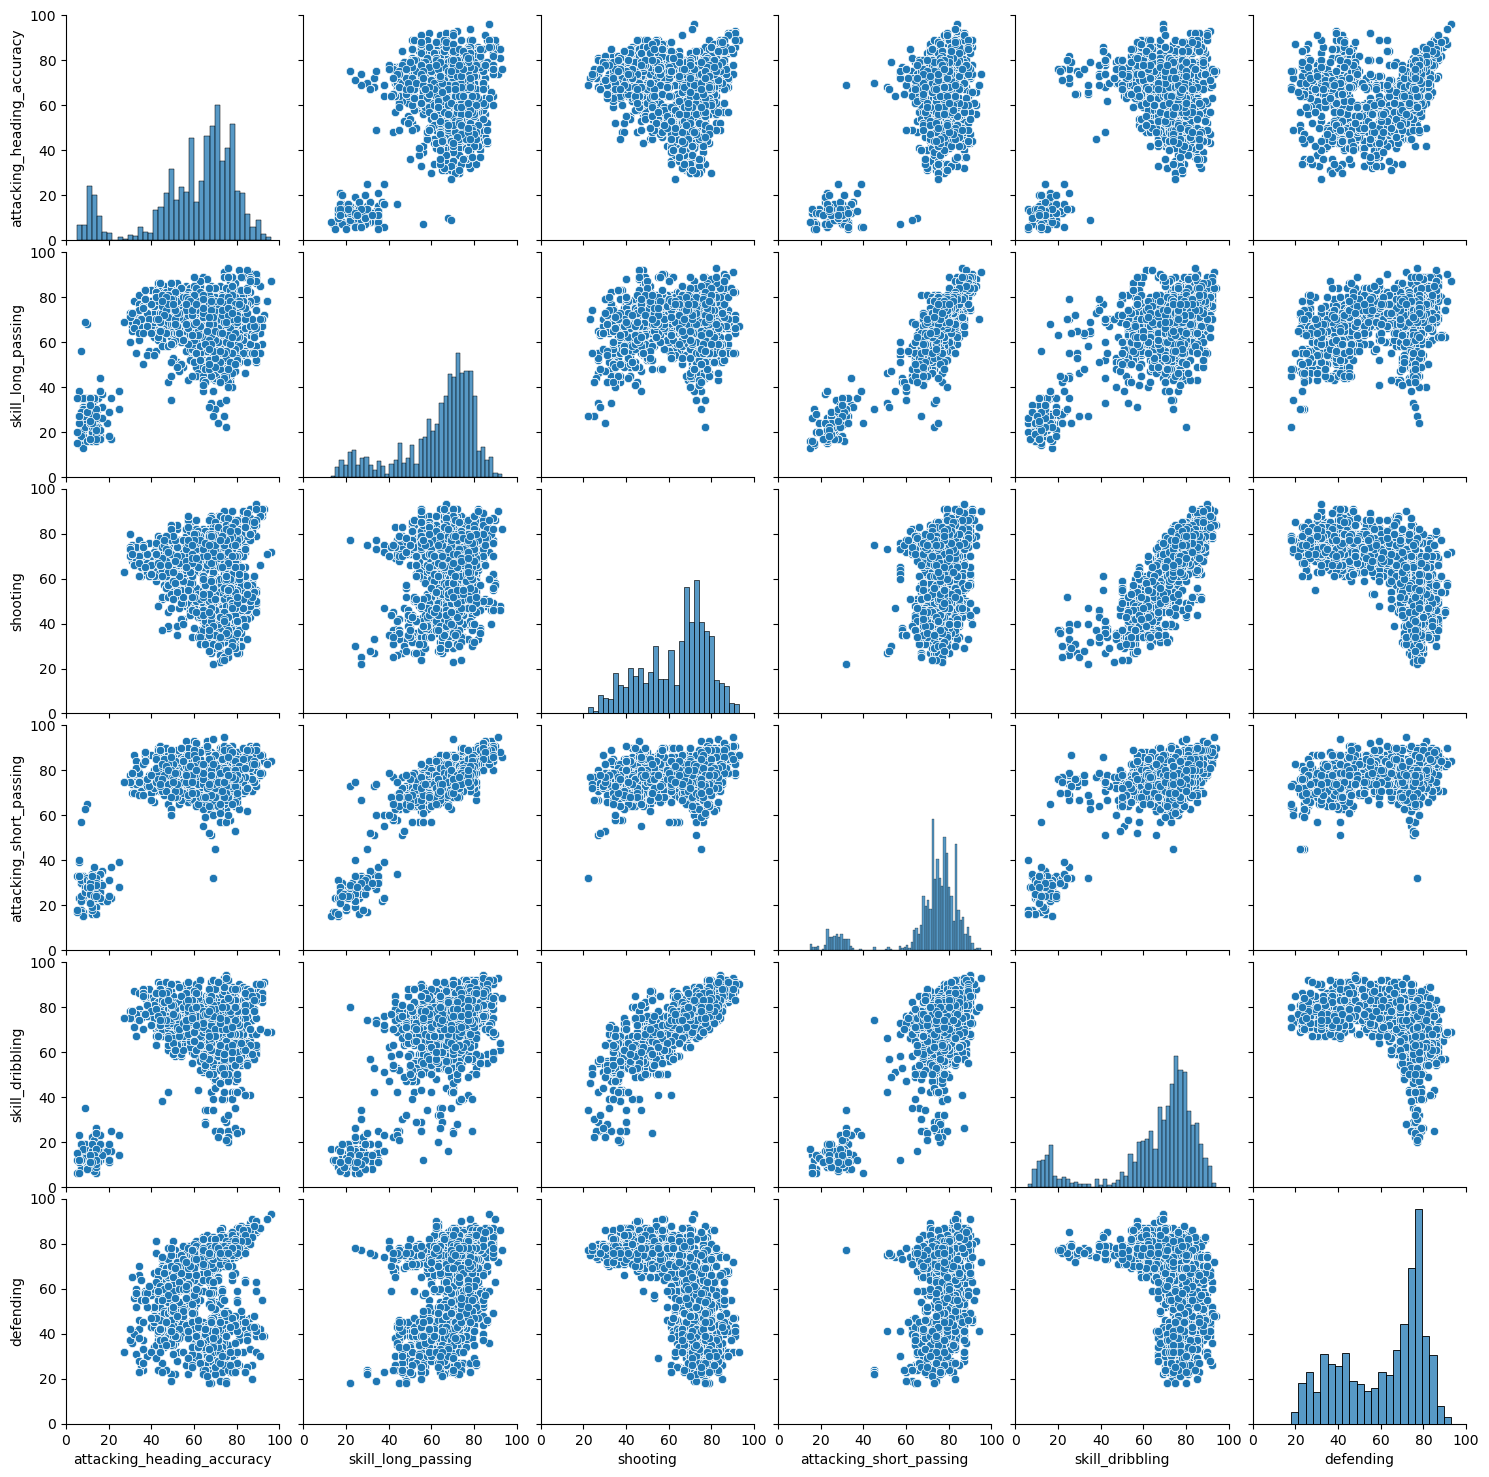

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear scatterplots para algunas combinaciones de variables numéricas

pairplot = sns.pairplot(df_skills[['attacking_heading_accuracy', 'skill_long_passing', 'shooting', 'attacking_short_passing', 'skill_dribbling', 'defending']])
for ax in pairplot.axes.flatten():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
plt.show()


En estos graficos observamos que hay varias combinaciones de variables que hacen que en los scatter plot se difencien el grupo de las arqueras. Esto se ve como una "mancha" a valors bajos de ambas skills, como es el caso de skill_dribling vs attacking_heading_accuracy o skill_dribling vs skill_long_passing, etc. Por otro lado tambien hay varias combinaciones que no muestran distribuciones uniformes como por ejemploshooting vs defending, en donde los puntos describen una "media luna". El hecho que se distinga una forma podria indicar que esas variables estarin aportando a la segregacion de la informcion lo que ayudaria a la hora de intentar separar grupos i.e. clusterizar.

In [61]:
#Datos faltantes skills
# Suponiendo que tu DataFrame se llama df
missing_data = df_skills.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columns_with_missing_data = missing_data[missing_data > 0]

# Mostrar las columnas con la cantidad de datos faltantes
print(columns_with_missing_data)

pace                  897
shooting              897
passing               897
dribbling             897
defending             897
physic                897
goalkeeping_speed    7149
dtype: int64


Debido a que vamos a usar solo el data frame con skills para hacer el clustering, no sería necesario normalizar o escalar las variables. Las mismas se encuentran entre el rango de 10-100.
Sin embargo, hay variables con datos faltantes los cuales deberán ser imputados para que no entorpezcan el proceso de clustering. Luego como es conveniente imputar con los datos estandarizados, se proceden a hacer ambas cosas. 

Comentario: En los pairplots se ve que en el caso de datos faltantes corresponden a datas de arqueras.. pq  si vemos como se separan los datos por ejemplo en la primera filla attacking_heading_accuracy vemos por ejemplo que en el caso de shooting no hay valores que se crucen con los valores de attacking en el rango entre 0 y 20, esto nos genera la duda de si es correcto realizar las imputaciones, pues estariamos agregando los valores de la media a valores de las arqueras que no tienen esas habilidades.

In [62]:
# Escaleado de los datos
scaler = StandardScaler()
df_scaled = df_skills.copy()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_skills.columns)

df_scaled.head()


pace  shooting   passing  dribbling  defending    physic  \
0  1.394419  1.798809  0.564159   1.945137  -0.956320  1.718255   
1 -1.018118  0.572590  0.223500  -0.115997   1.685365  2.193281   
2  1.595464  1.798809  1.245477   1.716122  -0.697331  1.005717   
3  0.992330  1.798809  0.904818   1.601614  -1.111713  1.005717   
4  1.193374  0.895279  1.472583   1.143585   1.426376  2.430794   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.492871             1.517037                    1.518604   
1           -0.408983             0.550768                    1.761480   
2            0.540337             1.601060                    1.275727   
3            0.540337             1.559048                    1.615754   
4            1.299793             0.676803                    1.081426   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 0.417662           1.960374         1.156567     0.990238   
1                 0.770719           0.234353         0.181079     0.439806   
2                 1.182618           1.727128         1.017212     0.589924   
3                 0.770719           1.867076         1.203019     1.140356   
4                 0.829561           0.747495         0.645597     1.590709   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           0.867633            0.034092            1.139885   
1           0.335968            1.363404            0.775090   
2           0.973965            1.074423            1.191999   
3           1.239798            0.496461            1.087772   
4           1.558797            0.958831            0.775090   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               1.322195               1.046995          1.670302   
1              -0.235553              -0.529888         -0.925611   
2               1.257289               1.321235          1.179184   
3               0.802946               1.046995          0.547745   
4               1.062570               1.046995          1.389663   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0            2.403832          0.901004          2.041678       2.209209   
1            2.247745         -2.691701          1.564836       1.741478   
2            1.311222         -0.221716          1.962204       1.273746   
3            2.559919         -1.718677          1.644310       2.022117   
4            2.091658          0.901004          1.564836       2.302756   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0       1.138720        1.540002          1.428856              0.594766   
1       0.366938        2.094654          0.364383              1.555245   
2       1.138720        1.143822          1.162738             -0.312354   
3       0.366938        1.143822          1.428856              0.327966   
4       1.331665        1.856946          1.295797              1.235085   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                -1.244912               1.434749          0.978186   
1                 1.389712               0.406192         -0.250023   
2                -0.366704               1.311322          0.732544   
3                -1.284830               1.475891          0.793955   
4                 1.190119               0.529619          0.609723   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0             1.059327             1.842409                    -0.412141   
1             1.059327             1.221377                     1.578429   
2             1.801992             1.842409                    -0.534013   
3             1.687736             1.376635                    -0.493389   
4             0.316661             1.376635                     1.415933   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0       

In [63]:
# Imputación valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = df_scaled.copy()
df_scaled_imputed = imputer.fit_transform(df_scaled_imputed)
df_scaled_imputed = pd.DataFrame(df_scaled_imputed, columns=df_skills.columns)

df_scaled_imputed.head()

pace  shooting   passing  dribbling  defending    physic  \
0  1.394419  1.798809  0.564159   1.945137  -0.956320  1.718255   
1 -1.018118  0.572590  0.223500  -0.115997   1.685365  2.193281   
2  1.595464  1.798809  1.245477   1.716122  -0.697331  1.005717   
3  0.992330  1.798809  0.904818   1.601614  -1.111713  1.005717   
4  1.193374  0.895279  1.472583   1.143585   1.426376  2.430794   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.492871             1.517037                    1.518604   
1           -0.408983             0.550768                    1.761480   
2            0.540337             1.601060                    1.275727   
3            0.540337             1.559048                    1.615754   
4            1.299793             0.676803                    1.081426   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 0.417662           1.960374         1.156567     0.990238   
1                 0.770719           0.234353         0.181079     0.439806   
2                 1.182618           1.727128         1.017212     0.589924   
3                 0.770719           1.867076         1.203019     1.140356   
4                 0.829561           0.747495         0.645597     1.590709   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           0.867633            0.034092            1.139885   
1           0.335968            1.363404            0.775090   
2           0.973965            1.074423            1.191999   
3           1.239798            0.496461            1.087772   
4           1.558797            0.958831            0.775090   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               1.322195               1.046995          1.670302   
1              -0.235553              -0.529888         -0.925611   
2               1.257289               1.321235          1.179184   
3               0.802946               1.046995          0.547745   
4               1.062570               1.046995          1.389663   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0            2.403832          0.901004          2.041678       2.209209   
1            2.247745         -2.691701          1.564836       1.741478   
2            1.311222         -0.221716          1.962204       1.273746   
3            2.559919         -1.718677          1.644310       2.022117   
4            2.091658          0.901004          1.564836       2.302756   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0       1.138720        1.540002          1.428856              0.594766   
1       0.366938        2.094654          0.364383              1.555245   
2       1.138720        1.143822          1.162738             -0.312354   
3       0.366938        1.143822          1.428856              0.327966   
4       1.331665        1.856946          1.295797              1.235085   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                -1.244912               1.434749          0.978186   
1                 1.389712               0.406192         -0.250023   
2                -0.366704               1.311322          0.732544   
3                -1.284830               1.475891          0.793955   
4                 1.190119               0.529619          0.609723   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0             1.059327             1.842409                    -0.412141   
1             1.059327             1.221377                     1.578429   
2             1.801992             1.842409                    -0.534013   
3             1.687736             1.376635                    -0.493389   
4             0.316661             1.376635                     1.415933   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0       

### Clustering con KMeans

Procedemos a identificar grupos de jugadoras con habilidades similares utilizando técnicas de clustering.

In [64]:

# Número de clusters buscado
n_clust = 4 #asumimos que los datos se van a corresponder a 4 clases: arqueras, delanteras, defensoras y medio campo

km = KMeans(n_clusters=n_clust,random_state=42)
km.fit(df_scaled_imputed)

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)


Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  107239.91156266691


Elaboramos un grafico que muestre la distribución de las jugadores a partir de dos variables seleccionadas y mostrando el clustering obtenido.

In [65]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1] #1
skill_2=skills_ratings[4] #4

In [67]:
#kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
kmean_clusters = go.Scatter(x=df_scaled_imputed[skill_1], y=df_scaled_imputed[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
""" crack =go.Scatter(x=df_scaled_imputed.loc[bool_crack,skill_1], y=df_scaled_imputed.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text') """

data=[kmean_clusters]#,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [68]:
# Mostrar el gráfico en VS Code
pio.show(fig)

Se puede ver graficando estas dos variables (shooting vs defending) un claro exito en el proceso de clustering ya que se observan 3 conjuntos de puntos relativamente bien segregados. Luego como queremos distinguir las posiciones de las jugadoras en función de sus skills, vamos a eliminar los datos que corresponden a arqueras, lo cual se puede hacer facilmente con los atributos del mismo data set. Esto lo haremos eliminando skills que solo se le adjudican a las goalkeepers

Observación: Pedimos 4 clusters, se llega a observar un punto rojo en el centro, este punto se debe a las habilidades de las arqueras que fueron imputadas con cero, y queda claro que no tiene demasiado sentido la imputación. Las habilidades defending y shooting que estamos cruzando no son habilidades de arqueras. Si graficamos con otras dos habilidades vamos a poder ver los 4 clusters.

In [70]:
skill_1=skills_ratings[8] #1
skill_2=skills_ratings[14] #4#
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
""" crack =go.Scatter(x=df_scaled_imputed.loc[bool_crack,skill_1], y=df_scaled_imputed.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text') """

data=[kmean_clusters]#,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)

En esta visualización queda claro que aparece el cluster de las arqueras, sin embargo los otros 3 cluster no quedan bien divididos.

In [71]:
columns_gk = [('goalkeeping_diving', 'goalkeeping_handling',
                  'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
                  'goalkeeping_speed')]

In [121]:
pd.DataFrame(df_n.player_positions.value_counts().sort_index())

player_positions
CAM               412
CB               1396
CDM               537
CF                 23
CM               1023
GK                897
LB                557
LM                275
LW                356
LWB                36
RB                610
RM                385
RW                359
RWB                20
ST               1160

In [122]:
# Filtra las filas donde 'GK' no esté presente en la columna 'player_positions'
df_filtered = df_n[~df_n['player_positions'].str.contains('GK')]
df_filtered.info()
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 0 to 10000
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046 entries, 0 to 10000
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 7.1+ MB


### Clustering con KMeans sin Goalkeepers

Con lda idea de poder diferenciar mas facilmente a las jugadoras segun su posición, eliminamos GK. De esta forma buscaremos la manera de ver cuales variables favorecen a separarlas segun sean delanteras, medio campo o defensa.

In [124]:
# n=10000
# df_n=df.loc[:n] #los primeros n
# df_n=df_n[(df_n['overall']>70)] # mejores jugadoras

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending',
                  'physic', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                  'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle',
                  'defending_sliding_tackle']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills_2=df_filtered[skills_ratings]

35 variables numéricas: skills/habilidades


In [125]:
#Datos faltantes skills
# Suponiendo que tu DataFrame se llama df
missing_data = df_skills_2.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columns_with_missing_data = missing_data[missing_data > 0]

# Mostrar las columnas con la cantidad de datos faltantes
print(columns_with_missing_data)

Series([], dtype: int64)


Al sacar los GK no hay mas datos faltantes y ya no hacemos imputaciones.


Elaboramos un grafico que muestre la distribución de las jugadores, sin las arqueras, a partir de dos variables seleccionadas y mostrando el clustering obtenido.

In [126]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1] #1
skill_2=skills_ratings[4] #4

In [101]:
# Número de clusters buscado
n_clust = 3 #pues saque arqueras

km = KMeans(n_clusters=n_clust,random_state=42)
km.fit(df_skills_2)

# Etiquetas asignadas por el algoritmo
clusters_2 = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)


Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  23357947.158055857


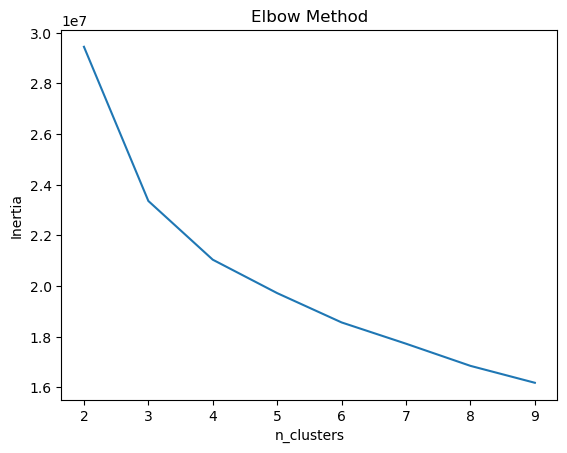

In [102]:
inertia = []
clusters = range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(df_skills_2)
    preds = clusterer.predict(df_skills_2)
    inertia.append(clusterer.inertia_)

plt.plot(clusters, inertia)
plt.ylabel('Inertia')
plt.xlabel('n_clusters')
plt.title('Elbow Method')
plt.show()

Con este gráfico da la impresión que 3 clusters en estos datos será correcto.

In [85]:
kmean_clusters = go.Scatter(x=df_skills_2[skill_1], y=df_skills_2[skill_2],
                           mode='markers',
                        text=df_filtered.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_2.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_2.loc[bool_crack,skill_1], y=df_skills_2.loc[bool_crack,skill_2],name='Cracks!!',
                      text=df_filtered.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means sin GK",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [86]:
# Mostrar el gráfico en VS Code
pio.show(fig)

### Clustering con Mean-Shift

Seguimos sin considerar arqueras. Ahora aplicamos otra técnica de clustering en la que no es posible setear la cantidad de clusters que se esperan.


Testeamos diferentes hiperparametros: bandwidth, cluster_alls, etc. El objetivo es encontrar parámetros que logren separar el data set en 3 clusters.

In [87]:
# Definir el rango de valores para cada hiperparámetro
bandwidths = [60,70,80]
cluster_alls = [True, False]

best_score = -1
best_params = {}

# Loop anidado para probar todas las combinaciones de parámetros
for bw in bandwidths:
        for cluster_all in cluster_alls:
                ms = MeanShift(bandwidth=bw, cluster_all=cluster_all)
                ms.fit(df_skills_2)

                clusters_ms = ms.labels_
                n_clusters_ = len(np.unique(clusters_ms))

                # Evaluar solo si se forman clusters
                if n_clusters_ > 1:
                    score = silhouette_score(df_skills_2, clusters_ms)
                    #print(f"Bandwidth: {bw}, Bin Seeding: {bin_seeding}, Cluster All: {cluster_all}, Min Bin Freq: {min_bin_freq}")
                    print(f"Bandwidth: {bw}, Cluster All: {cluster_all}")
                    print(f"Clusters encontrados: {n_clusters_}, Silhouette Score: {score}")

                    if score > best_score:
                        best_score = score
                        #best_params = {'bandwidth': bw, 'bin_seeding': bin_seeding, 'cluster_all': cluster_all, 'min_bin_freq': min_bin_freq}
                        best_params = {'bandwidth': bw, 'cluster_all': cluster_all}


# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {best_params}, con Silhouette Score: {best_score}")

Bandwidth: 60, Cluster All: True
Clusters encontrados: 6, Silhouette Score: 0.0939316682530966
Bandwidth: 60, Cluster All: False
Clusters encontrados: 7, Silhouette Score: -0.03821536076927414
Bandwidth: 70, Cluster All: True
Clusters encontrados: 2, Silhouette Score: 0.3380742433383987
Bandwidth: 70, Cluster All: False
Clusters encontrados: 3, Silhouette Score: 0.15350672734875503
Bandwidth: 80, Cluster All: False
Clusters encontrados: 2, Silhouette Score: 0.13239792895384128
Mejores parámetros encontrados: {'bandwidth': 70, 'cluster_all': True}, con Silhouette Score: 0.3380742433383987


In [89]:
#MeanShift calcula el bandwidth automáticamente
bw = estimate_bandwidth(df_skills_2, quantile=0.2, n_samples=500)
print(bw)

76.90970591977903


In [90]:
#Clustering

ms = MeanShift(bandwidth=bw, bin_seeding=True, cluster_all=False)
ms.fit(df_skills_2)

clusters_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_

labels_unique = np.unique(clusters_ms)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [91]:
MeanShift_clusters = go.Scatter(x=df_skills_2[skill_1], y=df_skills_2[skill_2],
                           mode='markers',
                        text=df_filtered.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_ms.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_2.loc[bool_crack,skill_1], y=df_skills_2.loc[bool_crack,skill_2],name='Top players',
                      text=df_filtered.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [92]:
# Mostrar el gráfico en VS Code
pio.show(fig)

5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?



Evaluamos los clusters obtenidos para determinar si las jugadoras agrupadas tienen habilidades equivalentes.

Vamos a agrupar los datos por los clusters y calcular la media de las principales variables para entender las características promedio de cada grupo.

In [127]:
df_clusters_KmSinGK = df_filtered.copy()
df_clusters_KmSinGK['kmeans_sinGK'] = clusters_2 #clusters
print('Kmeans encontró: ', max(clusters_2)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters_KmSinGK.head()

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   
2     226301    /player/226301/alex-morgan/230009            23            9   
3     227310  /player/227310/ada-hegerberg/230009            23            9   
4     227246    /player/227246/lucy-bronze/230009            23            9   

  fifa_update_date    short_name                      long_name  \
0       2023-01-13       S. Kerr              Samantha May Kerr   
1       2023-01-13     W. Renard      Wéndèleine Thérèse Renard   
2       2023-01-13     A. Morgan      Alexandra Morgan Carrasco   
3       2023-01-13  A. Hegerberg  Ada Martine Stolsmo Hegerberg   
4       2023-01-13     L. Bronze     Lucia Roberta Tough Bronze   

  player_positions  overall  potential    value_eur  wage_eur  age  \
0               ST       91         91  134500000.0    4000.0   28   
1               CB       91         91   89500000.0    3000.0   31   
2               ST       90         90          NaN       NaN   32   
3               ST       90         91  143000000.0    3000.0   26   
4               RB       89         89          NaN       NaN   30   

          dob  height_cm  weight_kg  league_id           league_name  \
0  1993-09-10        168         66     2216.0  Women's Super League   
1  1990-07-20        187         70     2218.0   Feminine Division 1   
2  1989-07-02        168         62        NaN                   NaN   
3  1995-07-10        176         68     2218.0   Feminine Division 1   
4  1991-10-28        171         65        NaN                   NaN   

   league_level  club_team_id  club_name club_position  club_jersey_number  \
0           1.0      116010.0  Chelsea W            ST                20.0   
1           1.0      116033.0     Lyon W           LCB                 3.0   
2           NaN           NaN        NaN           NaN                 NaN   
3           1.0      116033.0     Lyon W           RES                14.0   
4           NaN           NaN        NaN           NaN                 NaN   

  club_loaned_from club_joined_date  club_contract_valid_until_year  \
0              NaN       2020-01-01                          2024.0   
1              NaN       2006-07-01                          2026.0   
2              NaN              NaN                             NaN   
3              NaN       2014-07-01                          2024.0   
4              NaN              NaN                             NaN   

   nationality_id nationality_name  nation_team_id nation_position  \
0             195        Australia             NaN             NaN   
1              18           France        113003.0             LCB   
2              95    United States        113009.0              ST   
3              36           Norway        113007.0              ST   
4              14          England        113002.0              RB   

   nation_jersey_number preferred_foot  weak_foot  skill_moves  \
0                   NaN          Right          4            4   
1                   3.0          Right          3            2   
2                  13.0           Left          4            4   
3                  14.0          Right          4            4   
4                   2.0          Right          3            3   

   international_reputation    work_rate         body_type real_face  \
0                         5    High/High     Normal (170-)       Yes   
1                         5  High/Medium       Lean (185+)       Yes   
2                         5     High/Low            Unique       Yes   
3                         5  High/Medium  Normal (170-185)       Yes   
4                         5    High/High  Normal (170-185)       Yes   

   release_clause_eur                                        player_tags  \
0         275700000.0  #Aerial Threat, #Dr

In [128]:
# Seleccionar solo las columnas donde se observan marcadas dierencias segun el cluster
numerical_columns = [ 'shooting', 'defending',
        'attacking_finishing',
       'attacking_volleys', 'skill_dribbling',
       'skill_fk_accuracy', 'power_shot_power',
       'power_long_shots',
     'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']

# Agrupar por cluster y calcular la media de las variables numéricas
cluster_summary = df_filtered.groupby(clusters_2)[numerical_columns].mean()

# Mostrar el resumen
print(cluster_summary)


    shooting  defending  attacking_finishing  attacking_volleys  \
0  75.121674  37.153365            77.158451          68.709703   
1  43.765162  76.557228            40.255358          35.824441   
2  68.047083  70.580417            67.649167          57.642917   

   skill_dribbling  skill_fk_accuracy  power_shot_power  power_long_shots  \
0        78.904147          61.636933         74.066901         73.614241   
1        57.588235          43.828089         53.406749         42.246694   
2        76.244583          62.032917         70.527500         68.911250   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                33.975352              79.156103         70.399061   
1                76.089375              44.835385         50.643411   
2                73.617083              72.515417         74.048333   

   defending_marking_awareness  defending_standing_tackle  \
0                    34.633020                  34.938967   
1              

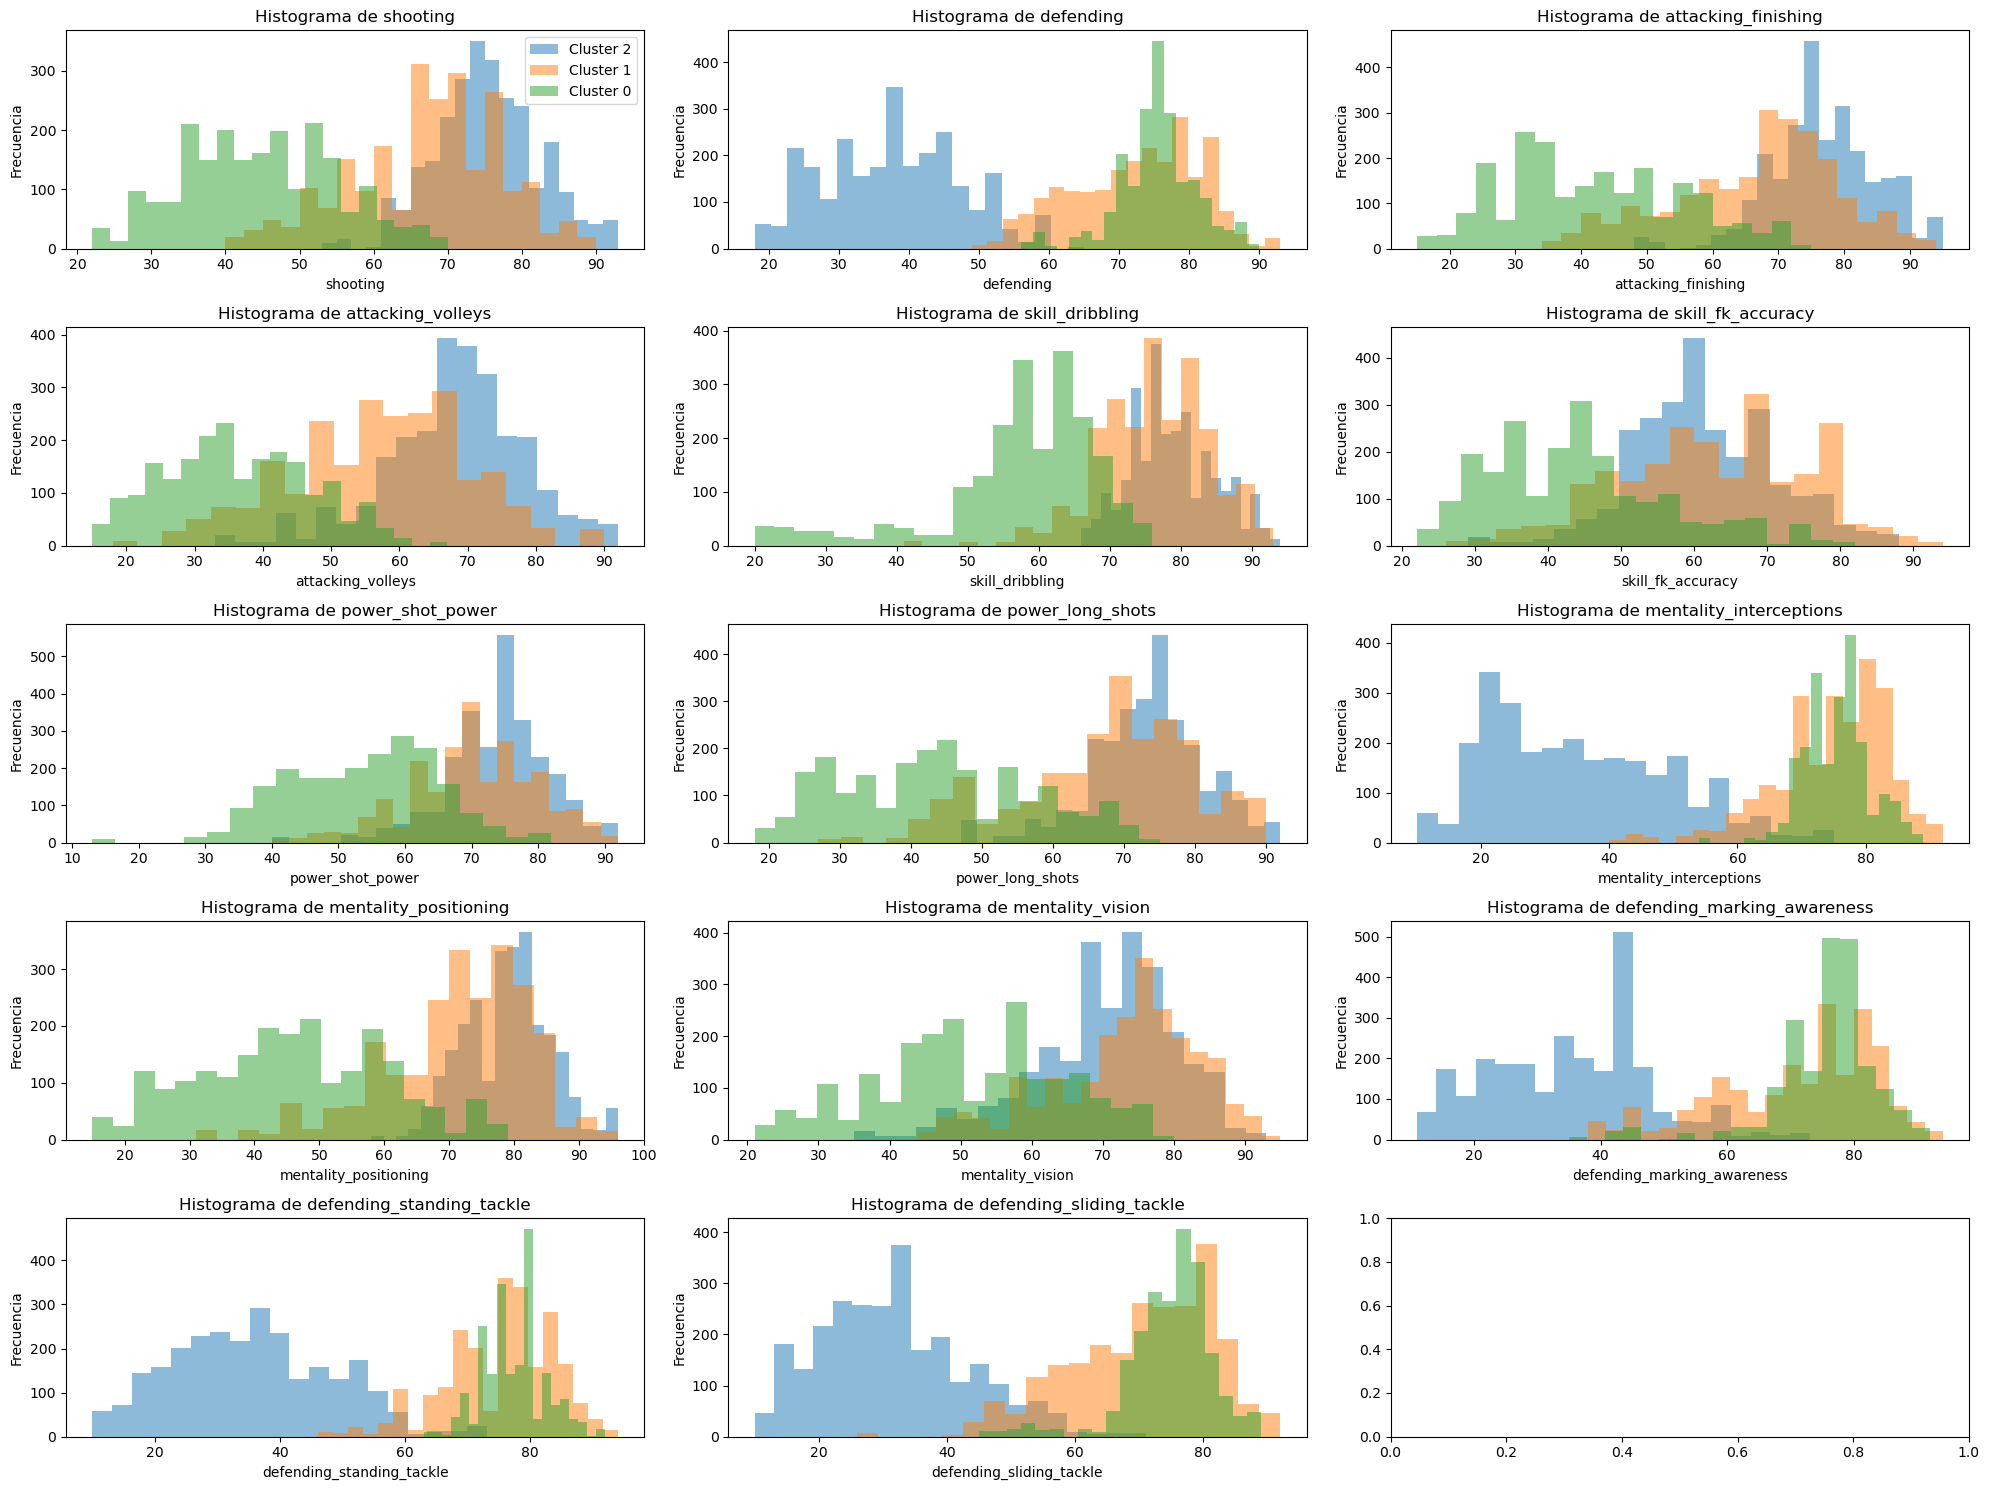

In [95]:
# Definir el número de columnas y filas para los subplots
n_cols = 3
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

# Crear una figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Iterar sobre cada columna y su correspondiente subplot
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    
    # Crear el histograma para cada categoría en 'kmeans_sinGK'
    for category in df_clusters_KmSinGK['kmeans_sinGK'].unique():
        ax.hist(df_clusters_KmSinGK[df_clusters_KmSinGK['kmeans_sinGK'] == category][column], 
                bins=20, alpha=0.5, label=f'Cluster {category}')
    
    # Configurar título y etiquetas
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Añadir leyenda al primer subplot
axes[0].legend()

# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Es interesante ver que si vemos en una sola variable logramos como máximo separar un cluster de los otros dos. Por ejemplo los primeros dos vemos que shooting separa bastante bien el cluster 0 del 1 del 2; por otro lado defending separa el cluster 2 del 0 y el 1. Al hacer la visualización en 2 variables (shooting y defending) que hicimos arriba podemos separar los 3 clusters.esta visualización por características individuales nos ayuda a elegir qué dos variables vale la pena correlacionar. 

Vamos a visualizar cuántas jugadoras hay en cada cluster, lo cual nos ayudará a entender la distribución y posibles diferencias en el tamaño de los clusters.

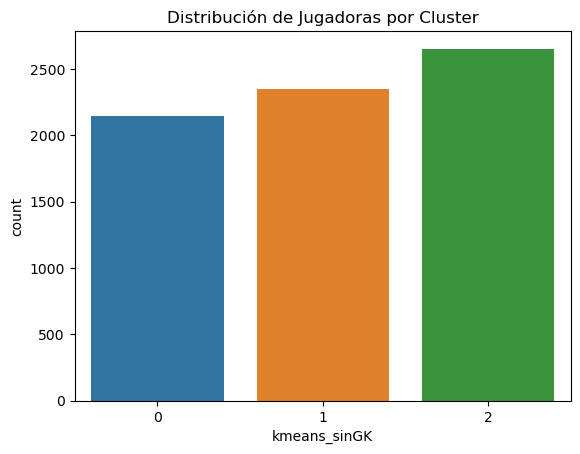

In [96]:
# Contar el número de jugadoras en cada cluster
sns.countplot(x='kmeans_sinGK', data=df_clusters_KmSinGK)
plt.title('Distribución de Jugadoras por Cluster')
plt.show()


Evaluamos la homogeneidad en las posiciones de las jugadoras dentro de cada cluster

In [129]:
# Agrupar por cluster y posición
cluster_positions = df_clusters_KmSinGK.groupby(['kmeans_sinGK', 'player_positions']).size().unstack().fillna(0)

# Mostrar la tabla resultante
print(cluster_positions)


player_positions    CAM      CB    CDM    CF     CM     LB     LM     LW  \
kmeans_sinGK                                                               
0                 291.0     0.0    0.0  14.0   35.0    0.0  225.0  277.0   
1                   0.0  1257.0  211.0   0.0   22.0  324.0    0.0    0.0   
2                 121.0   139.0  326.0   9.0  966.0  233.0   50.0   79.0   

player_positions   LWB     RB     RM     RW   RWB      ST  
kmeans_sinGK                                               
0                  0.0    0.0  286.0  299.0   0.0  1129.0  
1                 18.0  350.0    0.0    0.0  11.0     0.0  
2                 18.0  260.0   99.0   60.0   9.0    31.0  


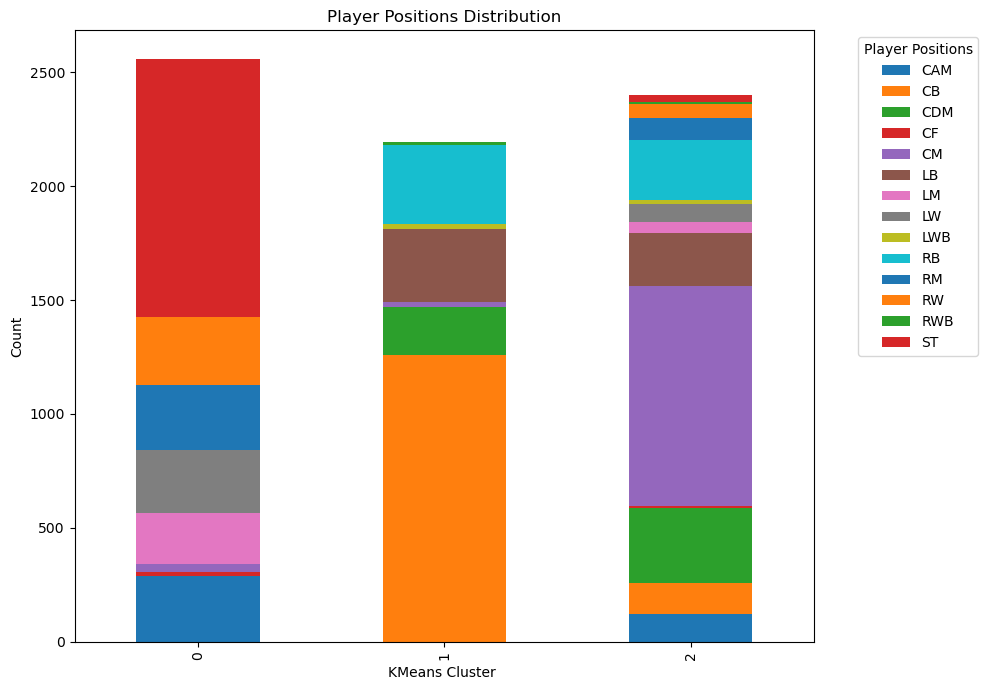

In [135]:
hist_data = df_clusters_KmSinGK.groupby(['kmeans_sinGK', 'player_positions']).size().unstack().fillna(0)


hist_data.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.ylabel('Count')
plt.xlabel('KMeans Cluster ')
plt.title('Player Positions Distribution')
plt.legend(title='Player Positions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

# Interpretación de Resultados:

    Cluster Summary: Si los valores de las variables clave son similares dentro de un cluster, esto sugiere que las jugadoras dentro de ese cluster tienen habilidades similares y podrían ser intercambiables en un equipo. Para una dada habilidad, por ejemplo defensiva, se espera que la media sea distinta en los distintos cluster. En particular, si pensamos en clusters segun las posiciones de las jugadoras, si la media es alta nos indica que ese cluster corresponde a jugadoras de defensa. A su vez debería pasar lo contrario con una habilidad asociada a jugadoras de ataque, mostrando un media menor para el cluster que asociamos a defensa.


    Distribución de Jugadoras: una distribución similar entre los cluster indicaría un data set equilibrado en las disitintas posiciones.


    Homogeneidad en Posiciones: Si un cluster tiene jugadoras de muchas posiciones diferentes, es posible que estas jugadoras estén agrupadas por una combinación de habilidades específicas en lugar de su posición en el campo. La variable player_positions no ayuda a la separación de posiciones debido que una misma jugadora posee multiples respuestas en la mayoria de casos.

    Del último grafico en el que vemos la distribución de las posiciones en los clusters podemos ver que en el cluster 1 tenemos gran maytoría de ST (delanteras) em el segundo cluster tenemos mayoría de CB (defensoras) y en el tercer cluster tenemos mayoría de CM (centrales). 

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

Utilizamos técnicas de reducción de dimensionalidad para visualizar los clusters en un espacio 2D.

A continuación vamos a qudarnos con las variables numéricas mas relavantes para probar PCA, trabajando sobre la data sin arqueras

In [109]:

df_skills_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 0 to 10000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pace                         7149 non-null   float64
 1   shooting                     7149 non-null   float64
 2   passing                      7149 non-null   float64
 3   dribbling                    7149 non-null   float64
 4   defending                    7149 non-null   float64
 5   physic                       7149 non-null   float64
 6   attacking_crossing           7149 non-null   int64  
 7   attacking_finishing          7149 non-null   int64  
 8   attacking_heading_accuracy   7149 non-null   int64  
 9   attacking_short_passing      7149 non-null   int64  
 10  attacking_volleys            7149 non-null   int64  
 11  skill_dribbling              7149 non-null   int64  
 12  skill_curve                  7149 non-null   int64  
 13  skill_fk_accuracy

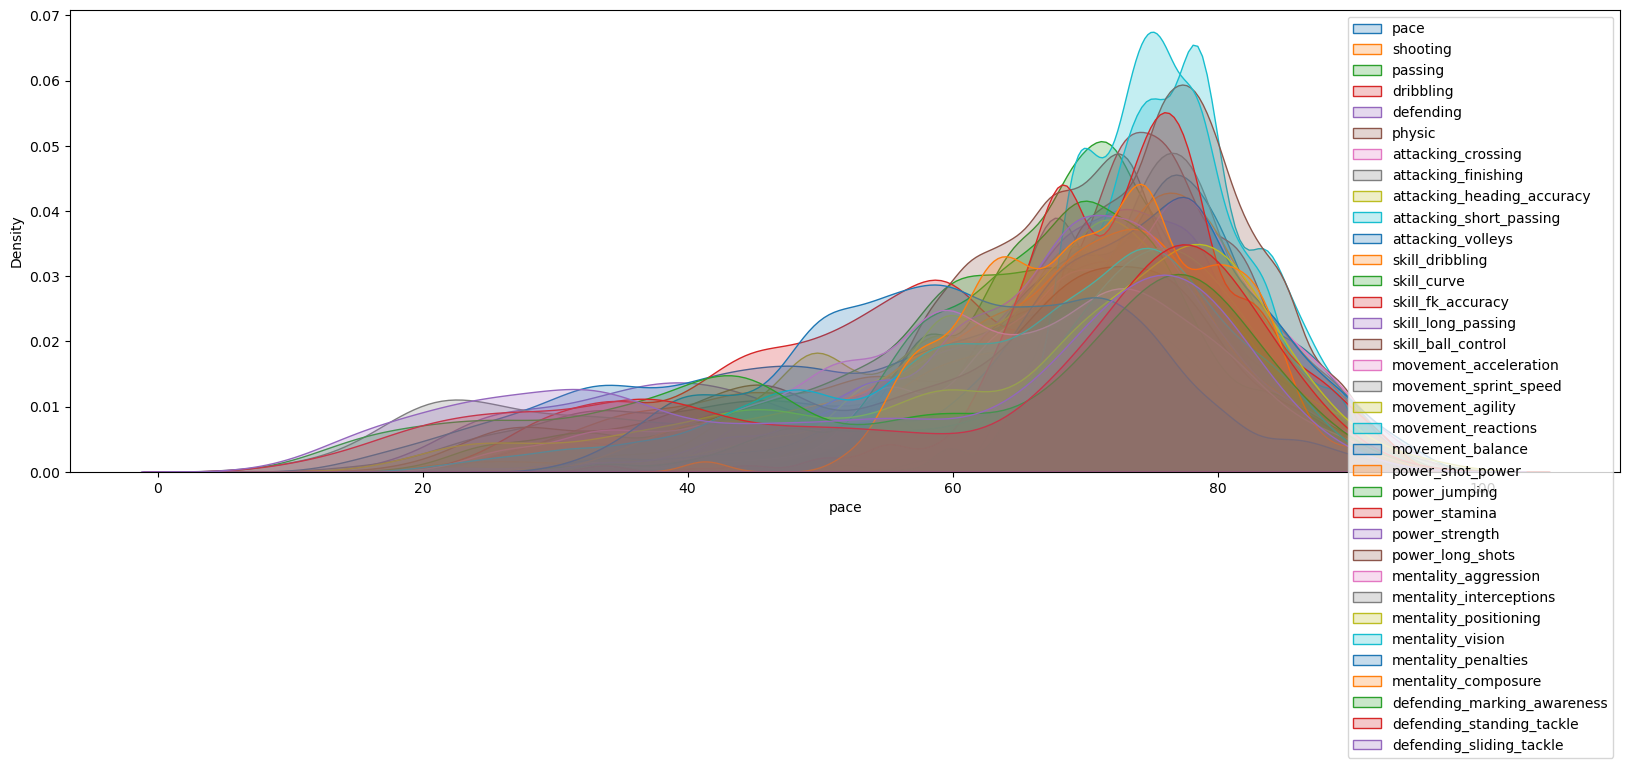

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Iterar sobre cada columna y crear un KDE plot con un color distinto
for col in df_skills_2.columns:
    sns.kdeplot(df_skills_2[col], shade=True, label=col)

# Añadir la leyenda para identificar las distribuciones
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()


Si nos quedamos sólo con estas variables de habilidades que están en el mismo rango, no parece necesario ningún tipo de escaleo.

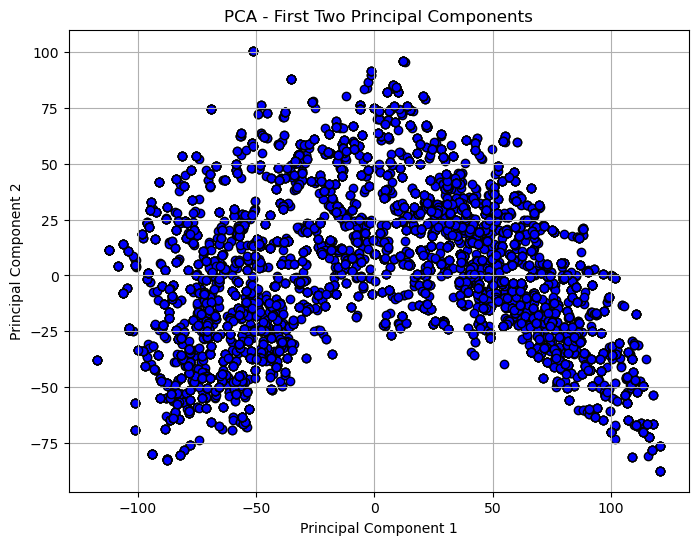

In [139]:
from sklearn.decomposition import PCA


# Realizar PCA sin estandarización
pca = PCA(n_components=8, random_state=1)
pca_result = pca.fit_transform(df_skills_2)
# Crear un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Tomar las dos primeras componentes principales
pc1 = df_pca['PC1']
pc2 = df_pca['PC2']

# Crear el scatter plot de las dos primeras dimensiones
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c='blue', edgecolor='k')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

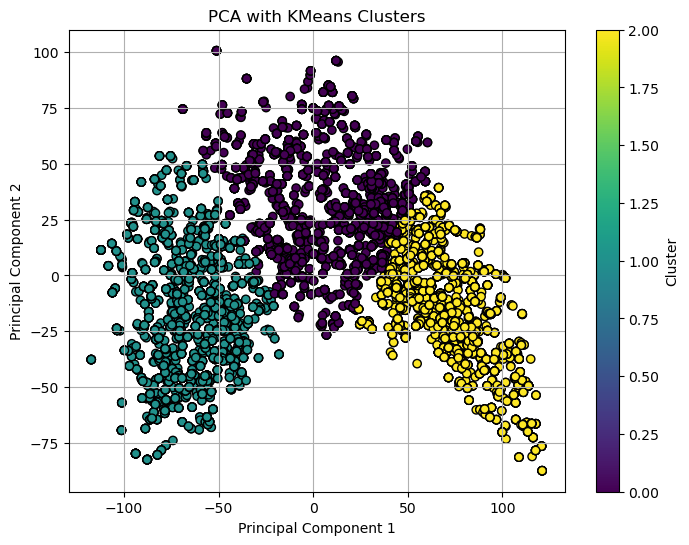

In [40]:
clusterer = KMeans(n_clusters=3, random_state=123).fit(pca_result)
clusters = clusterer.labels_

# Crear un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
df_pca['cluster'] = clusters

# Tomar las dos primeras componentes principales
pc1 = df_pca['PC1']
pc2 = df_pca['PC2']

# Crear el scatter plot de las dos primeras dimensiones con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=clusters, cmap='viridis', edgecolor='k')
plt.title('PCA with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

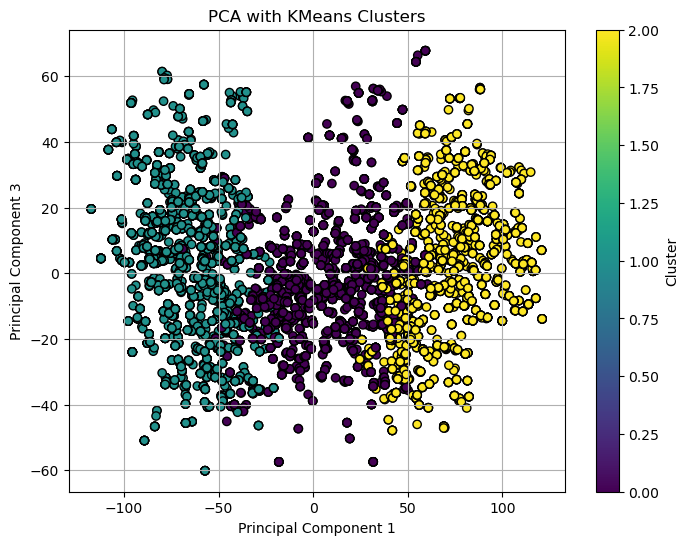

In [151]:
clusterer = KMeans(n_clusters=3, random_state=123).fit(pca_result)
clusters = clusterer.labels_

# Crear un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
df_pca['cluster'] = clusters

# Tomar las dos primeras componentes principales
pc1 = df_pca['PC1']
pc2 = df_pca['PC3']

# Crear el scatter plot de las dos primeras dimensiones con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=clusters, cmap='viridis', edgecolor='k')
plt.title('PCA with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()